# Лабораторная 2. Упражнение 2. Вариант 22 (=3)
## Реализуйте функцию $f(x_1,x_2) = NOT(x_1 \; XOR \; x_2)$. Выполните симуляцию. Получите математическое обоснование результата.

,0,1
0,{'1': 1024},{'0': 1024}
1,{'0': 1024},{'1': 1024}


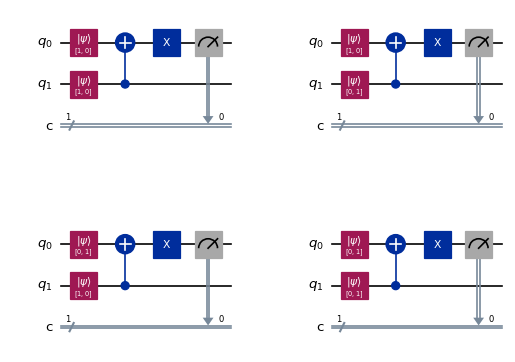

In [108]:


import pandas as pd
from matplotlib import pyplot as plt
from qiskit_aer import AerSimulator

simulator = AerSimulator()


def not_xor(ax, x1, x2):
    qc = QuantumCircuit(2, 1)

    qc.initialize([1 - x1, x1], 0)
    qc.initialize([1 - x2, x2], 1)

    qc.cx(1, 0)
    qc.x(0)
    qc.measure(0, 0)
    
    qc.draw('mpl', ax=ax)
    
    return simulator.run(qc).result().get_counts(qc)


_, axes = plt.subplots(2, 2)
pd.DataFrame({
    a: {
        b: not_xor(axes[a, b], a, b)
        for b in [0, 1]
    }
    for a in [0, 1]
})

## Реализуйте алгоритм получения остатка от деления числа 7 на 15. Выполните симуляцию. Получите математическое обоснование результата.

### Немного теории
1. Инициализация делимого
    - Делимое dividend записывается в двоичное представлени
    - Кубиты переводятся в состояние, соответствующее $| dividend\rangle$ 
2. Применение суперпозиции
    - Кубиты вводятся в состояние суперпозиции с помощью квантовых вентилей, таких как Адамара.
3. Фазовые сдвиги
    - Вносятся фазовые сдвиги, зависящие от делителя divisor. Это основа вычисления остатка.
4. Обратное QFT
    - Преобразует фазовую информацию обратно в амплитудное представление, чтобы результат можно было измерить.
5. Измерение 
    - После измерения состояние кубитов представляет собой результат деления в виде остатка.
### Квантовое преобразование Фурье (QFT)
QFT — это квантовый аналог дискретного преобразования Фурье. Оно преобразует состояние кубитов из временной области в фазовую, где информация о величинах представлена в виде фаз.

Обратное QFT: Используется для восстановления классического результата после применения фазовых сдвигов.
Формула QFT: 
- $QFT(|x\rangle) = \frac{1}{\sqrt{N}} \sum\limits_{y=0}^{N-1} e^{\frac{2 \Pi i xy}{N}} |y\rangle$
### Фазовые сдвиги  
\begin{align*}
P(\theta) & = 
\begin{bmatrix} 
1 & 0 \\ 
0 & e^{i\theta} 
\end{bmatrix}
\end{align*}

, где $\theta = \frac{2 \pi \cdot divisor \cdot 2^{i}}{2^{num_qubits}}$

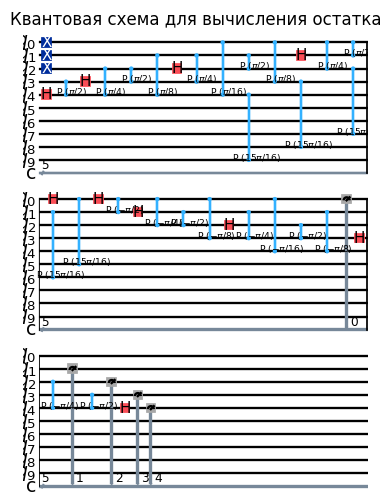

Остаток от деления 7 на 15: 7


In [109]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.circuit.library import QFT
import matplotlib.pyplot as plt
import numpy as np

def mod_algorithm(dividend, divisor):
    # Определяем количество кубитов
    num_qubits = max(dividend.bit_length(), divisor.bit_length()) + 1
    qc = QuantumCircuit(2 * num_qubits, num_qubits)  # Создаем квантовую схему

    binary_dividend = format(dividend, f'0{num_qubits}b')
    for i, bit in enumerate(reversed(binary_dividend)):
        if bit == '1':
            qc.x(i) 

    # Квантовое преобразование Фурье для первого регистра
    qc.append(QFT(num_qubits, do_swaps=False), range(num_qubits))

    # Применяем фазовые сдвиги для вычисления деления
    for i in range(num_qubits):
        qc.cp(2 * np.pi * (divisor / (2 ** num_qubits)), i, num_qubits + i)

    qc.append(QFT(num_qubits, do_swaps=False).inverse(), range(num_qubits))

    qc.measure(range(num_qubits), range(num_qubits))

    return qc

dividend = 7
divisor = 15

qc = mod_algorithm(dividend, divisor)
qc = transpile(qc, simulator)
counts = simulator.run(qc).result().get_counts(qc)

max_state = max(counts, key=counts.get)
remainder = int(max_state, 2)  

fig, ax = plt.subplots(figsize=(20, 6))
qc.draw('mpl', ax=ax)
plt.title("Квантовая схема для вычисления остатка")
plt.show()

print(f"Остаток от деления {dividend} на {divisor}: {remainder}")